In [1]:
import pandas as pd

In [2]:
bank_train = pd.read_csv('bank_train.csv')
bank_test = pd.read_csv('bank_test.csv')

In [3]:
bank_train.shape, bank_test.shape

((32592, 18), (8148, 17))

In [4]:
bank_train.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0,45,admin.,single,secondary,no,0,yes,no,cellular,8,may,38,1,-1,0,unknown,0
1,1,30,admin.,married,tertiary,no,631,no,no,cellular,13,aug,293,3,-1,0,unknown,0
2,2,56,retired,married,primary,no,152,yes,yes,cellular,30,jul,65,7,-1,0,unknown,0
3,3,57,management,divorced,unknown,no,2986,no,no,unknown,1,jun,1563,1,166,3,success,0
4,4,42,technician,married,secondary,no,166,no,no,cellular,16,jul,319,5,-1,0,unknown,0


In [5]:
bank_test.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32593,56,self-employed,married,unknown,no,7,no,no,unknown,6,may,305,2,-1,0,unknown
1,32594,33,management,married,tertiary,no,1071,no,no,cellular,12,aug,83,4,-1,0,unknown
2,32595,41,unemployed,married,primary,no,819,no,no,cellular,9,feb,244,3,-1,0,unknown
3,32596,41,admin.,married,secondary,no,2,yes,no,unknown,19,jun,64,1,-1,0,unknown
4,32597,25,management,single,tertiary,no,6246,no,no,cellular,9,jun,98,3,-1,0,unknown


In [6]:
bank_train.isnull().sum().sum(), bank_test.isnull().sum().sum()

(0, 0)

In [7]:
bank_train.dtypes

Id            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit       int64
dtype: object

# Using SkLearn

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
bank_train.set_index('Id', inplace=True)
bank_test.set_index('Id', inplace=True)

In [10]:
# Separate features and target label in bank_train
X = bank_train.drop(columns=['deposit'])
y = bank_train['deposit']

In [11]:
# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [12]:
X_train.shape, X_test.shape

((26073, 16), (6519, 16))

In [13]:
# Select categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

In [14]:
# Preprocessing for categorical data: One-hot encode categorical variables
categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [15]:
# Preprocessing for numerical data: Standard scaling
numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [16]:
# Create the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, numerical_cols),
        ('cat', categorical_preprocessor, categorical_cols)
    ])


In [17]:
# Create the full pipeline with Logistic Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])


In [18]:
# Train the pipeline
pipeline.fit(X_train, y_train)

c:\Users\owner\anaconda3\envs\mma867\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('classifier', LogisticRegression())])

In [19]:
# Predict on the validation set
y_pred_test = pipeline.predict(X_test)

In [20]:
# Calculate and print the accuracy on the validation set
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on the validation set: {accuracy:.4f}")

Accuracy on the validation set: 0.9804


In [21]:
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[6356   32]
 [  96   35]]


In [22]:
# Now predict on the test set (bank_test)
bank_test_pred = pipeline.predict(bank_test)

In [23]:
# Create a DataFrame from the bank_test DataFrame's Id and the bank_test_pred array
bank_test_pred_df = pd.DataFrame({
    'Id': bank_test.index,
    'deposit': bank_test_pred
})

bank_test_pred_df.head()

,Id,deposit
0,32593,0
1,32594,0
2,32595,0
3,32596,0
4,32597,0


In [24]:
bank_test_pred_df.to_csv('bank_predictions.csv', index=False)

In [25]:
# reading bank_test_labelled dataset
bank_test_labelled = pd.read_csv('bank_test_labelled.csv')

In [26]:
# actual labels in bank_test_labelled dataset
bank_test_labelled['deposit']

0       0
1       0
2       0
3       0
4       0
       ..
8143    0
8144    0
8145    0
8146    0
8147    0
Name: deposit, Length: 8148, dtype: int64

In [27]:
# accuracy on bank_test dataset (with actual labels in data_test_labelled.csv)
accuracy_score(bank_test_pred, bank_test_labelled['deposit'])

0.9804860088365243

In [28]:
# if you just predict no for every row in bank_test
accuracy_score([0]*len(bank_test_pred), bank_test_labelled['deposit'])

0.9798723613156602

# Using PyCaret

In [29]:
bank_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
Id,,,,,,,,,,,,,,,,,
0,45,admin.,single,secondary,no,0,yes,no,cellular,8,may,38,1,-1,0,unknown,0
1,30,admin.,married,tertiary,no,631,no,no,cellular,13,aug,293,3,-1,0,unknown,0
2,56,retired,married,primary,no,152,yes,yes,cellular,30,jul,65,7,-1,0,unknown,0
3,57,management,divorced,unknown,no,2986,no,no,unknown,1,jun,1563,1,166,3,success,0
4,42,technician,married,secondary,no,166,no,no,cellular,16,jul,319,5,-1,0,unknown,0


In [30]:
bank_train.shape

(32592, 17)

In [31]:
from pycaret.classification import *
s = setup(bank_train, target = 'deposit', session_id = 42)

,Description,Value
0,Session id,42
1,Target,deposit
2,Target type,Binary
3,Original data shape,"(32592, 17)"
4,Transformed data shape,"(32592, 49)"
5,Transformed train set shape,"(22814, 49)"
6,Transformed test set shape,"(9778, 49)"
7,Ordinal features,3
8,Numeric features,7
9,Categorical features,9


In [32]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9818,0.9704,0.1879,0.6564,0.2888,0.2826,0.3421,0.6640
lr,Logistic Regression,0.9813,0.9795,0.2578,0.5820,0.3544,0.3464,0.3776,1.8570
gbc,Gradient Boosting Classifier,0.9811,0.9796,0.2972,0.5624,0.3861,0.3774,0.3987,1.5980
et,Extra Trees Classifier,0.9808,0.9641,0.1267,0.6114,0.2068,0.2015,0.2691,0.7040
catboost,CatBoost Classifier,0.9806,0.9807,0.3583,0.5342,0.4244,0.4151,0.4258,9.0010
xgboost,Extreme Gradient Boosting,0.9804,0.9785,0.3562,0.5277,0.4203,0.4108,0.4215,0.4290
ada,Ada Boost Classifier,0.9803,0.9814,0.3451,0.5128,0.4113,0.4017,0.4105,0.6300
lightgbm,Light Gradient Boosting Machine,0.9801,0.9798,0.3364,0.5121,0.4012,0.3917,0.4031,0.5880
dummy,Dummy Classifier,0.9799,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2250
ridge,Ridge Classifier,0.9797,0.0000,0.0175,0.3083,0.0329,0.0313,0.0696,0.1850


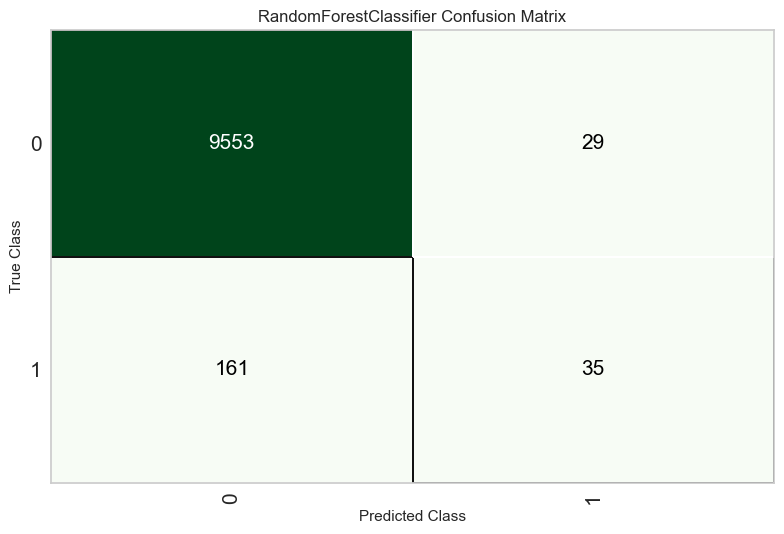

In [33]:
plot_model(best, plot = 'confusion_matrix')

In [34]:
# pycaret can automatically calculate metrics if test data has deposit column
predict_model(best, bank_test_labelled)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9821,0.9689,0.2256,0.6607,0.3364,0.3295,0.3795


,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,prediction_label,prediction_score
0,32593,56,self-employed,married,unknown,no,7,no,no,unknown,6,may,305,2,-1,0,unknown,0,0,0.99
1,32594,33,management,married,tertiary,no,1071,no,no,cellular,12,aug,83,4,-1,0,unknown,0,0,1.00
2,32595,41,unemployed,married,primary,no,819,no,no,cellular,9,feb,244,3,-1,0,unknown,0,0,1.00
3,32596,41,admin.,married,secondary,no,2,yes,no,unknown,19,jun,64,1,-1,0,unknown,0,0,0.99
4,32597,25,management,single,tertiary,no,6246,no,no,cellular,9,jun,98,3,-1,0,unknown,0,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8143,40736,32,admin.,single,secondary,no,1649,no,no,cellular,27,may,204,2,-1,0,unknown,0,0,1.00
8144,40737,47,admin.,married,secondary,no,3386,no,yes,cellular,10,jul,360,17,-1,0,unknown,0,0,0.98
8145,40738,56,self-employed,married,tertiary,no,719,no,no,cellular,27,aug,236,2,-1,0,unknown,0,0,1.00
8146,40739,32,management,married,primary,no,5,yes,no,cellular,16,apr,194,2,-1,0,unknown,0,0,1.00
